# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})


In [2]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

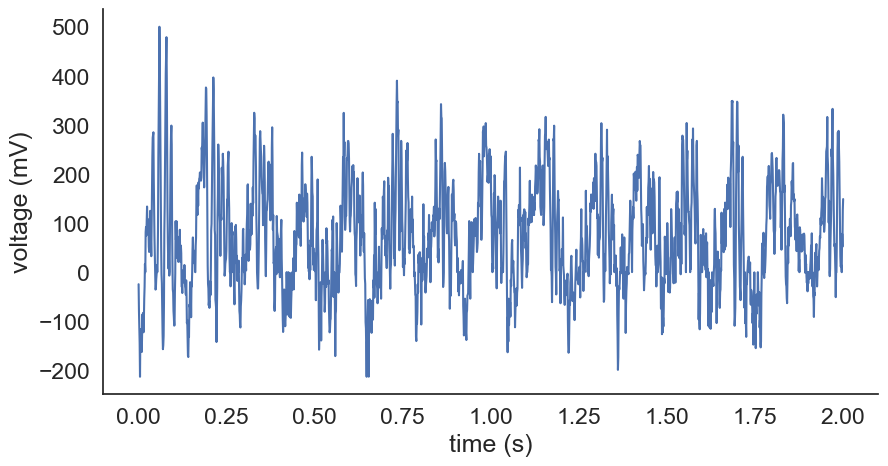

In [3]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

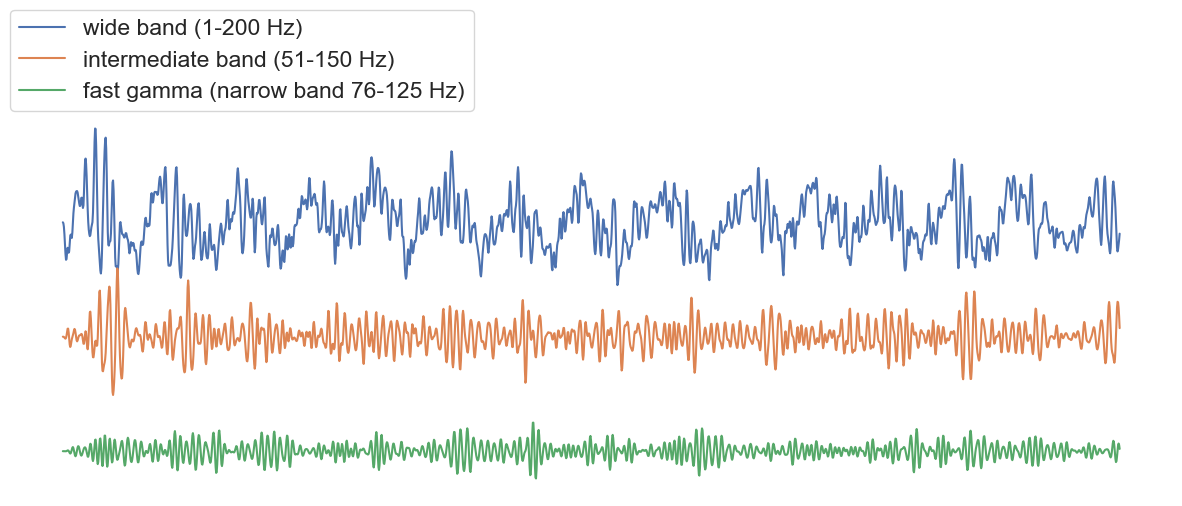

In [4]:
theta_lfp = lf.bandpass_filter(lfp,low_f=1,high_f=200, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=51,high_f=150, sampling_rate=sampling_rate)
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=76,high_f=125, sampling_rate=sampling_rate)

plot_offset = 500 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:2000]+2*plot_offset,label='wide band (1-200 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'intermediate band (51-150 Hz)')
plt.plot(fast_gamma_lfp[:2000],label = 'fast gamma (narrow band 76-125 Hz)')

plt.axis('off')
plt.legend(loc=(0,1))

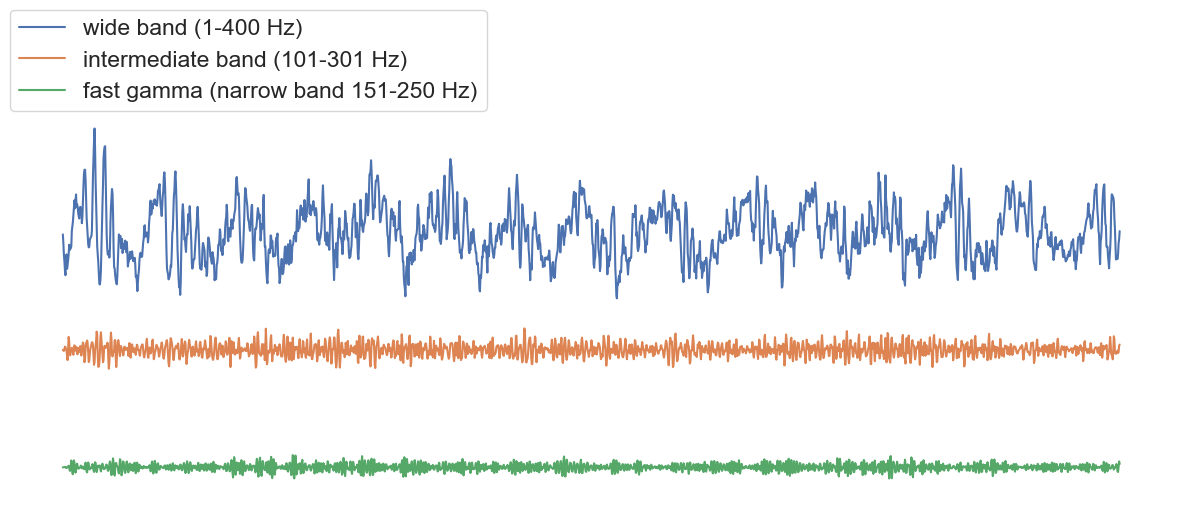

In [5]:
theta_lfp = lf.bandpass_filter(lfp,low_f=1,high_f=400, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=101,high_f=301, sampling_rate=sampling_rate)
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=151,high_f=250, sampling_rate=sampling_rate)

plot_offset = 500 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:2000]+2*plot_offset,label='wide band (1-400 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'intermediate band (101-301 Hz)')
plt.plot(fast_gamma_lfp[:2000],label = 'fast gamma (narrow band 151-250 Hz)')

plt.axis('off')
plt.legend(loc=(0,1))

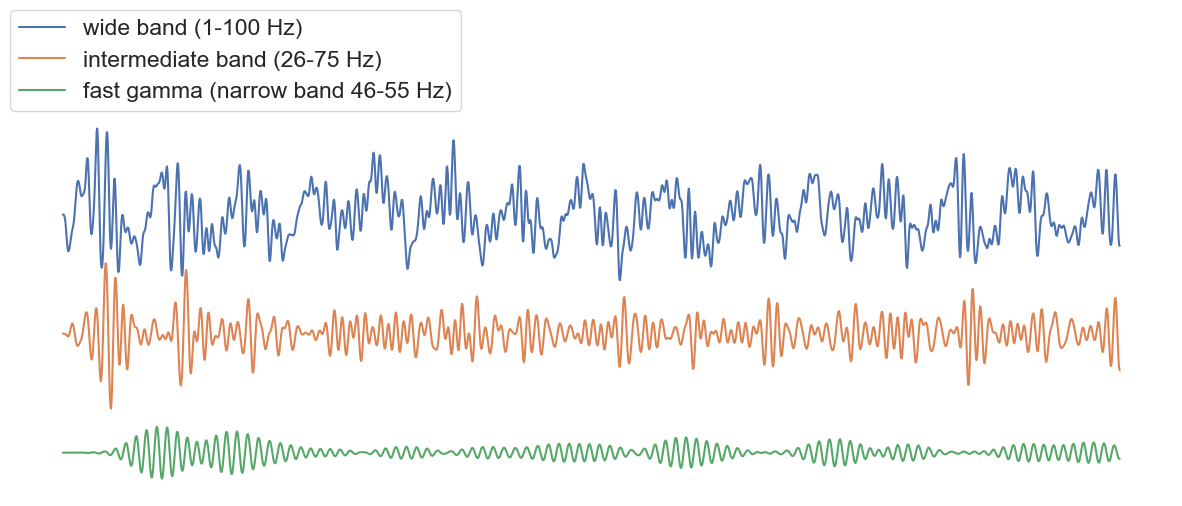

In [6]:
theta_lfp = lf.bandpass_filter(lfp,low_f=1,high_f=100, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=26,high_f=75, sampling_rate=sampling_rate)
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=46,high_f=55, sampling_rate=sampling_rate)

plot_offset = 500 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(theta_lfp[:2000]+2*plot_offset,label='wide band (1-100 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'intermediate band (26-75 Hz)')
plt.plot(fast_gamma_lfp[:2000],label = 'fast gamma (narrow band 46-55 Hz)')

plt.axis('off')
plt.legend(loc=(0,1))

In [7]:
print('time it takes to filter 2 seconds of lfp data with filter order 5 =')
%timeit lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=5)
print('time it takes to filter 2 seconds of lfp data with filter order 4 =')
%timeit lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=4)
print('time it takes to filter 2 seconds of lfp data with filter order 3 =')
%timeit lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=3)
print('time it takes to filter 2 seconds of lfp data with filter order 2 =')
%timeit lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=2)
print('time it takes to filter 2 seconds of lfp data with filter order 1 =')
%timeit lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=1)

time it takes to filter 2 seconds of lfp data with filter order 5 =
560 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
time it takes to filter 2 seconds of lfp data with filter order 4 =
459 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
time it takes to filter 2 seconds of lfp data with filter order 3 =
422 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
time it takes to filter 2 seconds of lfp data with filter order 2 =
306 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
time it takes to filter 2 seconds of lfp data with filter order 1 =
222 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


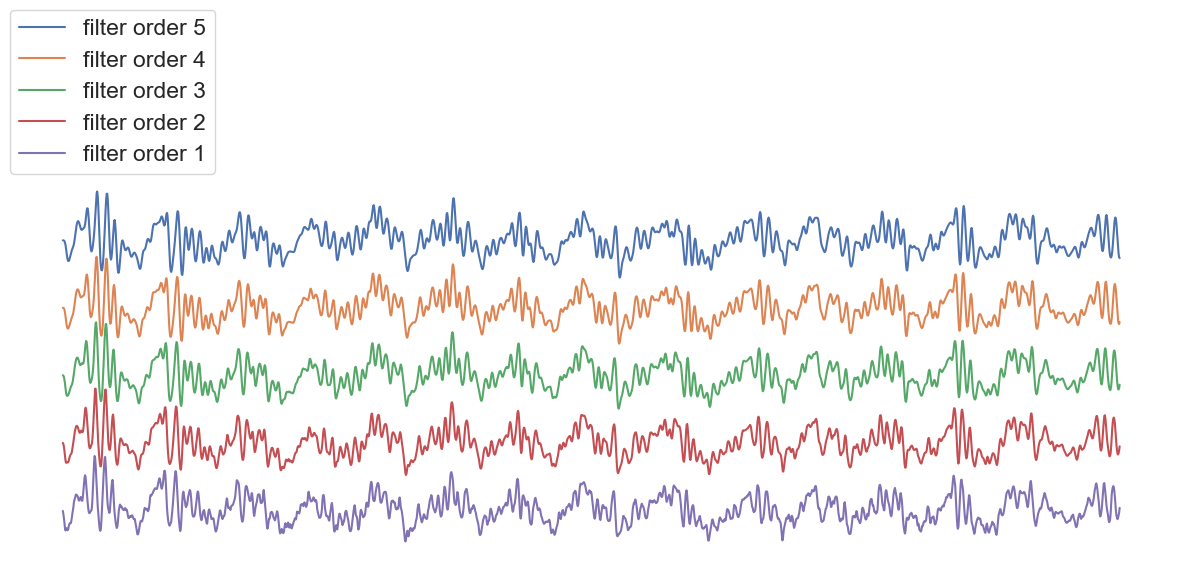

In [8]:
lfp_order5 = lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=5)
lfp_order4 = lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=4)
lfp_order3 = lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=3)
lfp_order2 = lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=2)
lfp_order1 = lf.bandpass_filter(lfp[:2000],low_f=1,high_f=100, sampling_rate=sampling_rate, filter_order=1)

plot_offset = 500 #to plot the signal on different lines

plt.figure(figsize=(15,5))
plt.plot(lfp_order5+2*plot_offset,label='filter order 5')
plt.plot(lfp_order4+plot_offset,label = 'filter order 4')
plt.plot(lfp_order3,label = 'filter order 3')
plt.plot(lfp_order2-plot_offset,label = 'filter order 2')
plt.plot(lfp_order1-2*plot_offset,label = 'filter order 1')

plt.axis('off')
plt.legend(loc=(0,1))

The higher the order of the filter the longer the computing time will be. On top of that the higher the order of the filter, the better the filter will be at removing hihger frequencies. This can be seen in the plot of the filtered signal. The higher the order of the filter, the more the signal will be smoothed out, even if the frequency band is the same. Higher frequencies above the band will be better removed with higher order filters.

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [9]:
from scipy import signal
from pywt import scale2frequency
from pywt import cwt

In [10]:
from pywt import wavelist

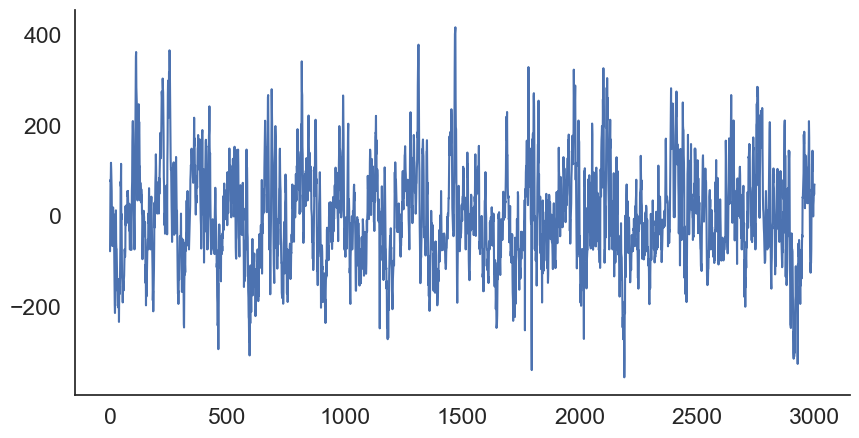

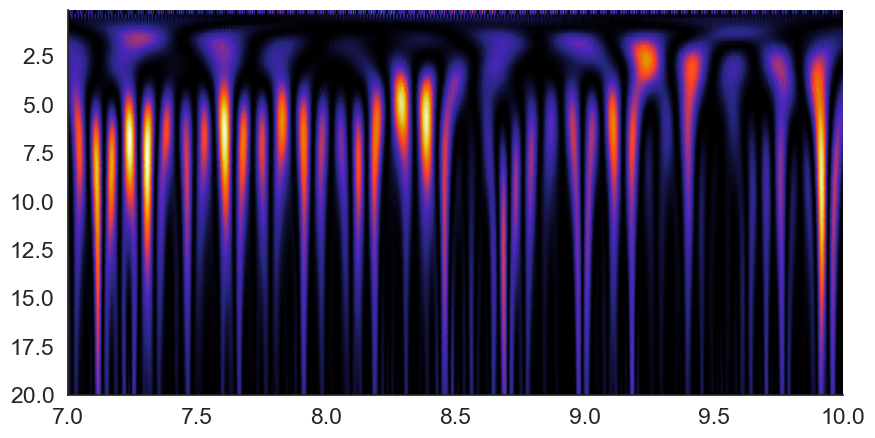

In [12]:
from pywt import scale2frequency
from pywt import cwt

start = 7 #in seconds
end = 10 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)



frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


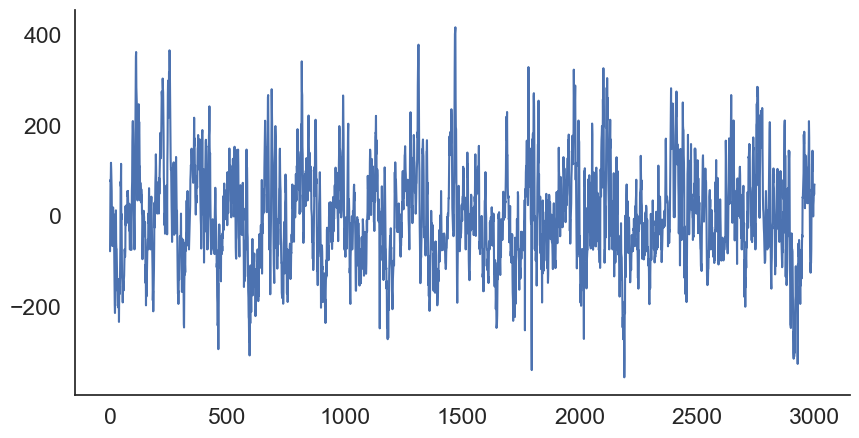

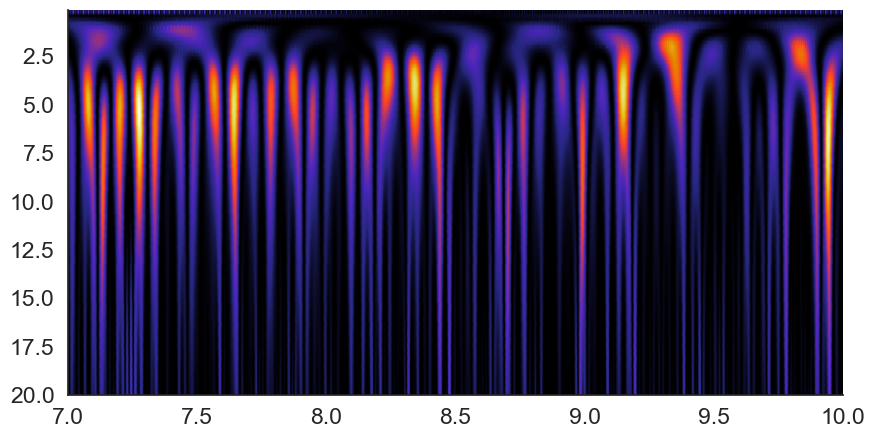

In [17]:
from pywt import scale2frequency
from pywt import cwt

start = 7 #in seconds
end = 10 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)



frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


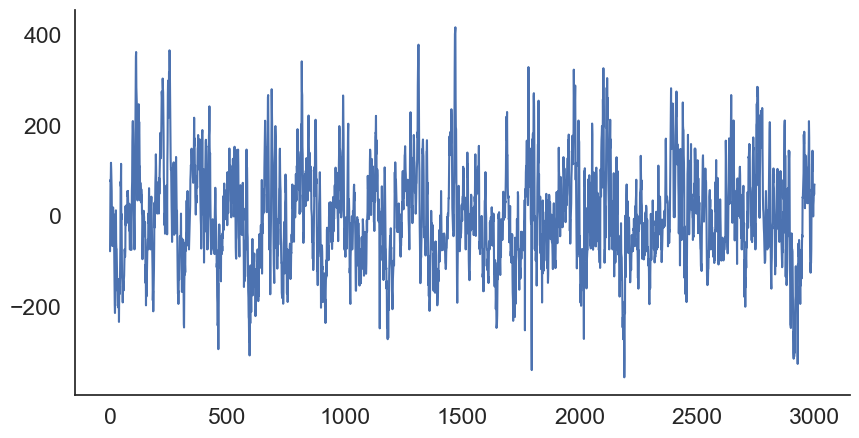

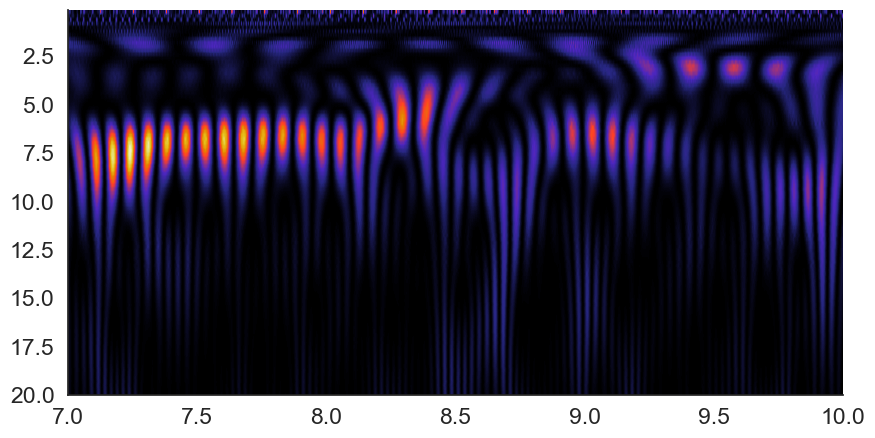

In [15]:
from pywt import scale2frequency
from pywt import cwt

start = 7 #in seconds
end = 10 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)



frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


Text(0, 0.5, 'power (a.u.)')

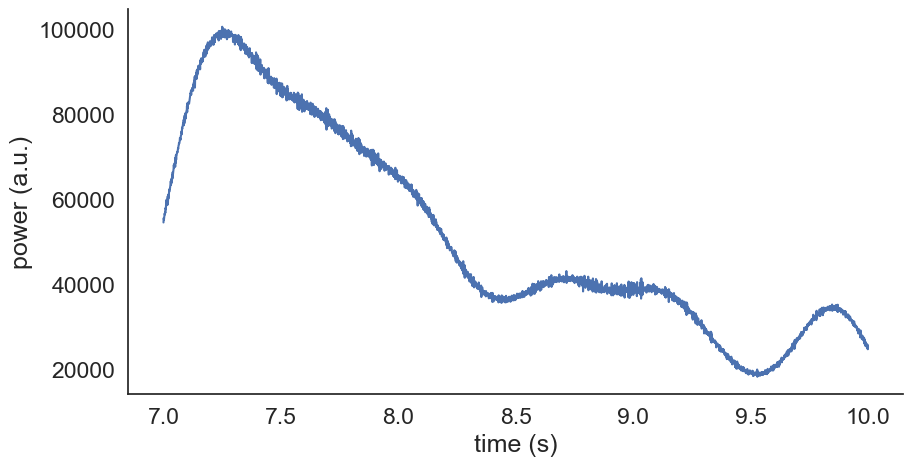

In [28]:
start = 7 #in seconds
end = 10 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor7.5-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power = np.mean(abs(cwtmatr)**2,axis=0)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(start,end,len(power)),power)
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')

The spectrum computed with the complex Morlet transform only shows the power of the signal at a certain frequency, with a certain bandwidth. The real wavelets show the power of the signal at a whole range of frequencies. The complex transform also clearly shows that the power of the certain frequency goes down with time, which is not the case for the real wavelets. This is likely due to the fact that the complex transform also takes into account the phase of the signal, which the real wavelets do not.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

Text(0, 0.5, 'power (a.u.)')

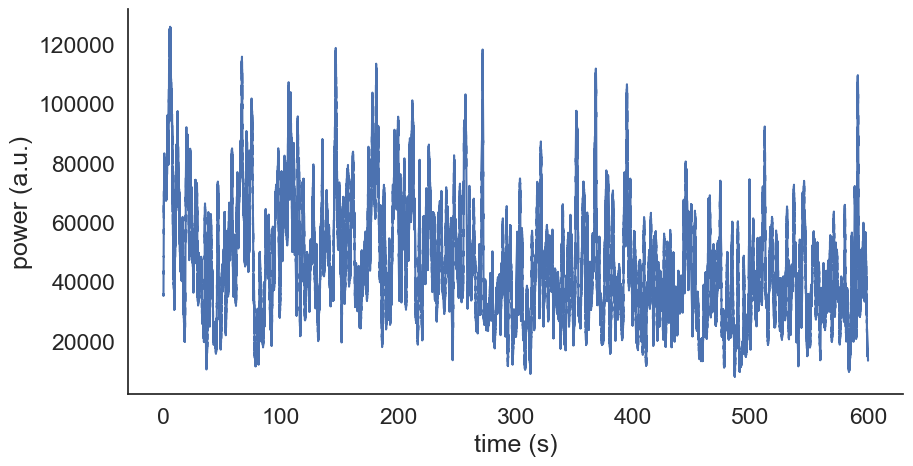

In [65]:
start = 0 #in seconds
end = 600 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor8.0-2.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_theta = np.mean(abs(cwtmatr)**2,axis=0)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(start,end,len(power_theta)),power_theta)
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')

Text(0, 0.5, 'power (a.u.)')

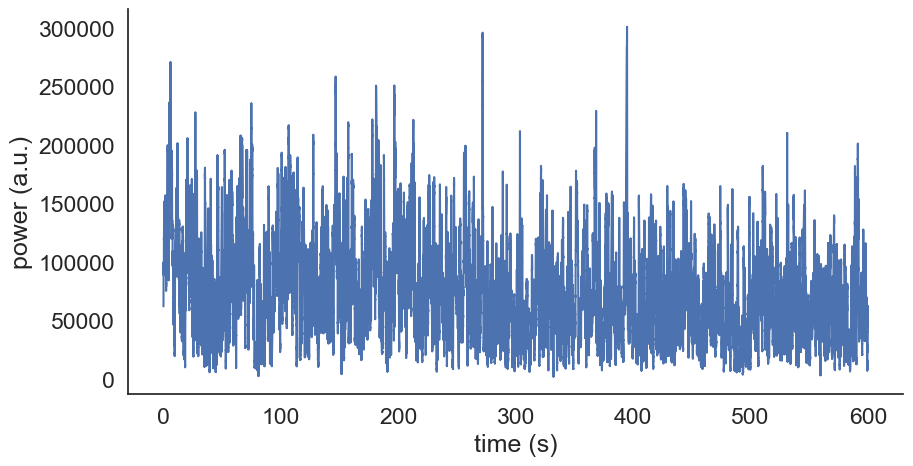

In [66]:
start = 0 #in seconds
end = 600 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(6,10,50)/sampling_rate
wavelet = 'cmor3.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_delta = np.mean(abs(cwtmatr)**2,axis=0)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(start,end,len(power_delta)),power_delta)
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')

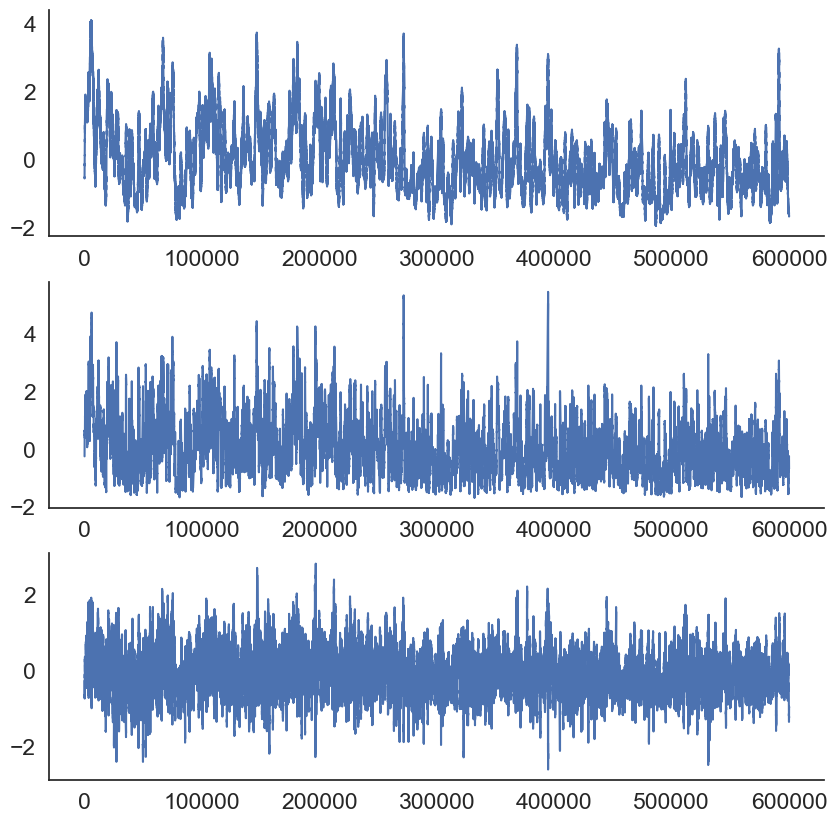

In [120]:
import scipy.stats as stats
power_theta_z = stats.zscore(power_theta)
power_delta_z = stats.zscore(power_delta)
threshold = 0.2
power_difference = power_theta_z - power_delta_z
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(power_theta_z,label='theta')
plt.subplot(3,1,2)
plt.plot(power_delta_z,label='delta')
plt.subplot(3,1,3)
plt.plot(power_difference,label='theta-delta')


In [121]:
REM_periods = np.where(power_difference>threshold)[0]
nREM_periods = np.where(power_difference<-threshold)[0]

In [122]:
threshold_crossings = power_difference > threshold
window_size = 1000  # Minimum number of consecutive data points above threshold

# Identify connected components (labeling)
labeled_components, num_objects = label(threshold_crossings)

# Extract starting and ending indices for REM periods
rem_periods = []
for label_num in range(1, num_objects + 1):  # Skip background (label 0)
  # Find indices where the current label is present
  indices = np.where(labeled_components == label_num)[0]
  # Check if the length of the continuous block is above the window size
  if len(indices) >= window_size:
    start_idx = indices[0]
    end_idx = indices[-1] + 1  # +1 to include the last index
    rem_periods.append((start_idx, end_idx))
print(rem_periods)

[(106796, 107809)]


In [123]:
threshold_crossings = power_difference < threshold
window_size = 1000  # Minimum number of consecutive data points above threshold

# Identify connected components (labeling)
labeled_components, num_objects = label(threshold_crossings)

# Extract starting and ending indices for REM periods
nrem_periods = []
for label_num in range(1, num_objects + 1):  # Skip background (label 0)
  # Find indices where the current label is present
  indices = np.where(labeled_components == label_num)[0]
  # Check if the length of the continuous block is above the window size
  if len(indices) >= window_size:
    start_idx = indices[0]
    end_idx = indices[-1] + 1  # +1 to include the last index
    nrem_periods.append((start_idx, end_idx))
print(nrem_periods)

[(33333, 34790), (35728, 37342), (40974, 42095), (42367, 43627), (47970, 49264), (76932, 82204), (83493, 85824), (90830, 92242), (190863, 191905), (215352, 217452), (219888, 221358), (244768, 246521), (266713, 267742), (273670, 274676), (280691, 282962), (296085, 298872), (299107, 301023), (306942, 309027), (310288, 313417), (332286, 333582), (335421, 336464), (336921, 338692), (341705, 343320), (348991, 350589), (353776, 355453), (371972, 373368), (373476, 375107), (379529, 381118), (389052, 391431), (401597, 404529), (410151, 411866), (420012, 421084), (426580, 428538), (432306, 433732), (436437, 438015), (453407, 455069), (455201, 460788), (462063, 463775), (470043, 471646), (475361, 478734), (485259, 488133), (489755, 493416), (494726, 496968), (497012, 498098), (500720, 501885), (504218, 505467), (514441, 515644), (520136, 521251), (523787, 525196), (525467, 527283), (539370, 541283), (547677, 548871), (549599, 552118), (560478, 562527), (568304, 570070), (582774, 585284), (586797

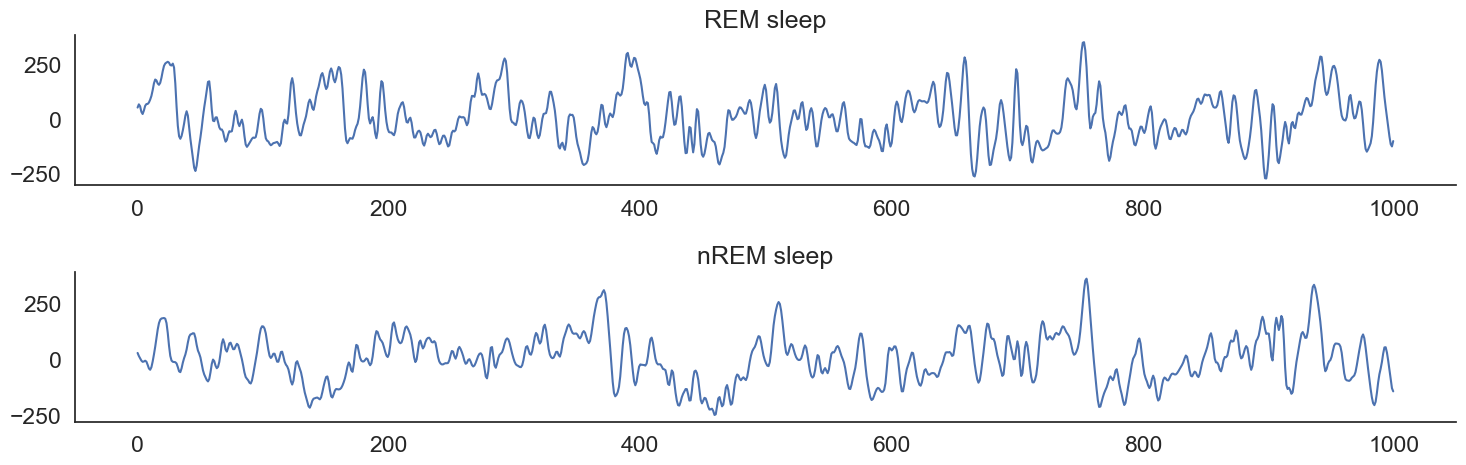

In [124]:
signal = lf.bandpass_filter(lfp,low_f=1,high_f=200, sampling_rate=sampling_rate, filter_order=5)
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(signal[rem_periods[0][0]:rem_periods[0][0]+1000],label = 'Period of REM sleep')
plt.title("REM sleep")
plt.subplot(2,1,2)
plt.plot(signal[nrem_periods[0][0]:nrem_periods[0][0]+1000],label = 'Period of nREM sleep')
plt.title("nREM sleep")
plt.tight_layout()
plt.show()


decreasing the threshold, will increase the REM sleep detected. This is because the difference between the theta and delta power can be smaller and still be considered REM sleep. Increasing the threshold will decrease the amount of REM sleep detected.